# Cas d'etude sur cas cardiaques


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Import train test split module
from sklearn.model_selection import train_test_split

# Import Non-linear Algorithms
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
filename='../datasets/heart.csv'
try:
    data=read_csv(filename)
    print('Dataset loaded!')
except:
    print('Failed to load the dataset!')
    
        

Dataset loaded!


## Creation Classification Model

In [10]:
# Get dataframe values as 2D-array
array = data.values
# Split Input (X) and output (Y)
X = array[ : , 0 : -1] # Inputs
Y = array[ : , -1] # Output
# Define test size
test_proportion = 0.7
# Define seed to garantee the same instances for each execution
seed = 7
# Split data into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_proportion, random_state=seed)
# Training the model

model=DecisionTreeClassifier()

model.fit(X_train, Y_train) # Train model (apprentissage)
# Evaluation
result = model.score(X_test, Y_test)

# Get prediction
prediction = model.predict(X_test)
matrix = confusion_matrix(Y_test, prediction)
print(f'Confusion Matrix\n------------------\n{matrix}')

def metrics(matrix):
    TN, FN, FP, TP = matrix.ravel()
    acc = (TN + TP)/ (TP + TN + FP + FN)
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    f1 = 2 * ((prec * rec) / (prec + rec))
    return acc, prec, rec, spec, f1
print(f'Evaluation Metrics\n-------------------')
acc, prec, rec, spec, f1 = metrics(matrix)
print(f'Accuracy: {(acc*100).round(2)} %')
print(f'Precision: {(prec*100).round(2)} %')
print(f'Racall: {(rec*100).round(2)} %')
print(f'Specificity: {(spec*100).round(2)} %')
print(f'F1-Score: {(f1*100).round(2)} %')


Confusion Matrix
------------------
[[321  39]
 [ 16 342]]
Evaluation Metrics
-------------------
Accuracy: 92.34 %
Precision: 95.53 %
Racall: 89.76 %
Specificity: 95.25 %
F1-Score: 92.56 %


In [11]:
import pickle

model_name='classification_model.pickle'
pickle.dump(model, open(model_name, 'wb'))
print(f'Model Saved !!!')


Model Saved !!!


## Analyse Exploratoire de Donnee

In [63]:
# Peak at Data
set_option('display.width',150)

print(f'Head\n--------\n{data.head()}')
print(f'Tail\n--------\n{data.tail()}')
print(f'Shape\n--------\n{data.shape}')
print(f'Dasaset info\n--------')
print(f'{data.info()}')


Head
--------
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2       0
Tail
--------
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
1020   59    1   1       140   221    0        1      164      1      0.0      2   0     2       1
1021   60    1   0       125   258    0        0      141      1      2.8      1   1     3       0
1022   47    1   0       110   275    0        0      118      1      1.0      1   1     2       0


In [62]:
set_option('display.width',150)

print (f'Head\n-------\n{data.head()}')

Head
-------
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2       0


In [44]:
 from pandas import set_option
set_option('display.width',150)
set_option('display.precision',1)
print(f'Descriptive Statistics\n------------------------\n{data.describe()}')
print(f'Descriptive Statistics(include all)\n------------------------\n{data.describe(include="all")}')

Descriptive Statistics
------------------------
          age     sex      cp  trestbps    chol     fbs  restecg  thalach   exang  oldpeak   slope      ca    thal  target
count  1025.0  1025.0  1025.0    1025.0  1025.0  1025.0   1025.0   1025.0  1025.0   1025.0  1025.0  1025.0  1025.0  1025.0
mean     54.4     0.7     0.9     131.6   246.0     0.1      0.5    149.1     0.3      1.1     1.4     0.8     2.3     0.5
std       9.1     0.5     1.0      17.5    51.6     0.4      0.5     23.0     0.5      1.2     0.6     1.0     0.6     0.5
min      29.0     0.0     0.0      94.0   126.0     0.0      0.0     71.0     0.0      0.0     0.0     0.0     0.0     0.0
25%      48.0     0.0     0.0     120.0   211.0     0.0      0.0    132.0     0.0      0.0     1.0     0.0     2.0     0.0
50%      56.0     1.0     1.0     130.0   240.0     0.0      1.0    152.0     0.0      0.8     1.0     0.0     2.0     1.0
75%      61.0     1.0     2.0     140.0   275.0     0.0      1.0    166.0     1.0      1.8 

## -Question 1

L'analyse de donnees nous a permis de savoir qu'il ya au total 1025 individus dont 312 Femmes avec un age minimum de 34 ans, maximum de 76 ans et une moyenne d'age de 55 ans, ainsi que 713 Hommes avec un age minimum de 29 ans, maximum de 77 ans et une moyenne d'age de 53 ans ce qui montre que les femmes sont plus agees et moins nombreuses que les hommes dans les donnees receuillis 

## Distribution par Age


In [45]:
Age= raw_data.groupby('age').mean()
set_option('display.width',150)
print(f'\n La Distribution par age \n---------------------------------\n{Age}')


 La Distribution par age 
---------------------------------
     sex   cp  trestbps   chol      fbs  restecg  thalach    exang  oldpeak  slope       ca  thal   target
age                                                                                                       
29   1.0  1.0     130.0  204.0  0.0e+00      0.0    202.0  0.0e+00      0.0    2.0  0.0e+00   2.0  1.0e+00
34   0.5  2.0     118.0  196.0  0.0e+00      0.5    183.0  0.0e+00      0.3    2.0  0.0e+00   2.0  1.0e+00
35   0.7  0.3     126.5  209.2  0.0e+00      0.8    160.8  4.7e-01      0.8    1.7  0.0e+00   2.5  5.3e-01
37   0.5  2.0     125.0  232.5  0.0e+00      1.0    178.5  0.0e+00      1.8    1.0  0.0e+00   2.0  1.0e+00
38   1.0  2.3     132.0  193.7  0.0e+00      1.0    176.0  3.3e-01      1.3    1.7  2.7e+00   2.3  6.7e-01
39   0.5  1.4     123.3  236.9  0.0e+00      0.8    160.8  0.0e+00      0.3    1.4  0.0e+00   2.3  7.1e-01
40   1.0  0.8     133.5  196.1  0.0e+00      0.6    155.8  6.4e-01      1.1    1.6 

##  -Question 2

Ici, on constate que la maladie est plus presente chez les femmes avec 226 femmes sur 312 soit 70% que chez les hommes avec 300 hommes sur 713 soit 40% ,ceci nous permet de dire que les femmes sont plus exposees a la maladie que les hommes.

##  Distribution par cas Malade/Saint

In [13]:
raw_data=data.copy()
cas= raw_data.groupby('target').size()
print(f'\n Les Cas present \n---------------------------------\n{cas}')



 Les Cas present 
---------------------------------
target
0    499
1    526
dtype: int64


In [61]:
sexe_case= raw_data.groupby("sex").agg(sexe_case_mean=("target","mean"))
sexe_case

,sexe_case_mean
sex,
0,0.7
1,0.4


## Distribution par Sexe

In [46]:
sexe_cas= raw_data[["sex","target"]].groupby(["sex","target"]).size()
sexe_cas

sex  target
0    0          86
     1         226
1    0         413
     1         300
dtype: int64

In [49]:
sexe_age= raw_data.groupby("sex").agg(age_moyen=("age","mean"))
sexe_age

,age_moyen
sex,
0,55.8
1,53.8


In [50]:
sexe_age= raw_data.groupby("sex").agg(age_min=("age","min"))
sexe_age

,age_min
sex,
0,34
1,29


In [51]:
sexe_age= raw_data.groupby("sex").agg(age_max=("age","max"))
sexe_age

,age_max
sex,
0,76
1,77


## -Question 3



Apres analyse on constate que  pour la moyenne des cas malades il y'a la presence de douleurs  thoraciques tandis que  les cas non-malades n'ont presque pas de douleur.




## Types de  douleurs

In [74]:
raw_data.groupby(["target","cp"],).agg(
   Cp_moyenne=("cp","mean"),
   
)
print(f'Les Cp {data.cp}')

Les Cp 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    0
1024    0
Name: cp, Length: 1025, dtype: int64


Les Differents cas 
--------------------------


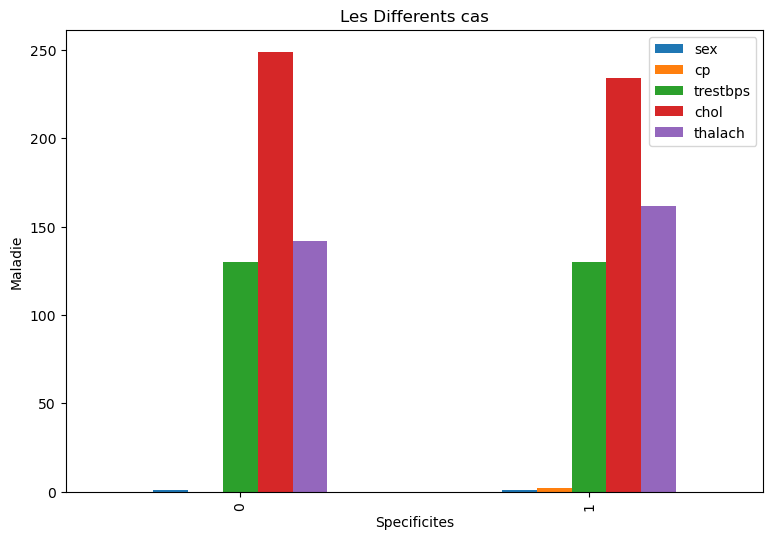

In [84]:
print(f'Les Differents cas \n--------------------------')
df1= raw_data.groupby('target').median()
df1=df1.reset_index().plot(x='target',y=['sex','cp','trestbps','chol','thalach']
  
                        ,kind='bar',figsize=(9,6))
plt.title("Les Differents cas")
plt.xlabel("Specificites")
plt.ylabel("Maladie")
plt.show()


##  -Question 4

--Cas malade
La pression arterielle moyenne est: 131,5
Le Cholesterole moyen est : 246,0
frequence cardiaque est : 138,5
--Cas non-malade
La pression arterielle moyenne est: 146,5
Le Cholesterole moyen est : 276,7
frequence cardiaque est : 142,3


In [86]:
raw_data.groupby(["target","sex"], as_index=False).agg(
   cp_moyenne=("cp","mean"),
  trestbps_moyenne=("trestbps","mean"),
 chol_moyenne=("chol","mean"),
 thalach_moyenne=("thalach","mean")
)

,target,sex,cp_moyenne,trestbps_moyenne,chol_moyenne,thalach_moyenne
0,0,0,0.2,146.5,276.7,142.3
1,0,1,0.5,131.5,246.0,138.5
2,1,0,1.3,128.8,255.6,154.1
3,1,1,1.4,129.6,229.9,162.0
